In [39]:
# This notebook follows the tutorial located here:
# https://pytorch.org/tutorials/beginner/data_loading_tutorial.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform
import os

In [3]:
landmarks_frame = pd.read_csv('/Users/babyhandzzz/Desktop/ELEPH@NT/Datasets/faces/face_landmarks.csv')

In [5]:
landmarks_frame.shape

(69, 137)

In [9]:
landmarks_frame.head()

,image_name,part_0_x,part_0_y,part_1_x,part_1_y,part_2_x,part_2_y,part_3_x,part_3_y,part_4_x,...,part_63_x,part_63_y,part_64_x,part_64_y,part_65_x,part_65_y,part_66_x,part_66_y,part_67_x,part_67_y
0,0805personali01.jpg,27,83,27,98,29,113,33,127,39,...,93,136,100,141,93,135,89,135,84,134
1,1084239450_e76e00b7e7.jpg,70,236,71,257,75,278,82,299,90,...,148,311,179,308,149,312,137,314,128,312
2,10comm-decarlo.jpg,66,114,65,128,67,142,68,156,72,...,128,162,136,167,127,166,121,165,116,164
3,110276240_bec305da91.jpg,42,140,45,161,51,180,61,200,73,...,144,197,180,189,147,204,136,208,125,209
4,1198_0_861.jpg,138,392,141,427,145,464,152,501,166,...,293,507,331,511,294,516,279,518,265,516


In [23]:
n = 65
img_name = landmarks_frame.iloc[n,0 ]
landmarks = landmarks_frame.iloc[n,1:]
landmarks = np.asarray(landmarks)
landmarks = landmarks.astype('float').reshape(-1, 2)

print('Image name: {}'.format(img_name))
print('Landmarks shape: {}'.format(landmarks.shape))
print('First 4 Landmarks: {}'.format(landmarks[:4]))

Image name: person-7.jpg
Landmarks shape: (68, 2)
First 4 Landmarks: [[32. 65.]
 [33. 76.]
 [34. 86.]
 [34. 97.]]


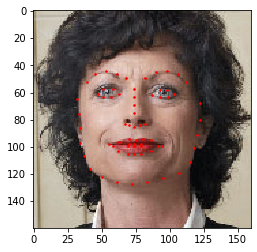

In [40]:
def show_landmarks(image, landmakrs):
    plt.imshow(image)
    plt.scatter(landmakrs[:,0], landmakrs[:,1], s=10,marker='.',c='r')
    plt.pause(0.001)

plt.figure()    
show_landmarks(io.imread(os.path.join('/Users/babyhandzzz/Desktop/ELEPH@NT/Datasets/faces', img_name)),
               landmarks)
plt.show()


In [ ]:
class FaceLandmarksDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

        ## These are 2 must-override methods## 
        def __len__(self):
            return len(self.landmarks_frame)
            
        def __getitem__(self, idx):
            if torch.is_tensor(idx):
                idx = idx.tolist()
        #####################################
        # get image's name
        img_name = os.path.join(self.root_dir, self.landmarks_frame.iloc[idx,0])
        image = plt.imread(img_name)






